# Feature Analysis

This notebook computes some statistics on the feature distribution.

**Some variables**

In [1]:
input_csv_file = './DBK.DE_eval_set.csv'

In [2]:
# imports
import pandas as pd
import random
import math
from datetime import date
import datetime
#from datetime import timedelta

# plotting
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style 
import numpy as np

## Load csv data

We assume a csv file containing stock prices with features from `colnames`.

In [3]:
# import features
features = pd.read_csv(input_csv_file, header='infer', delimiter=',',  decimal='.', index_col='date')
# sort by date ascending 
features.sort_index(ascending=True, inplace=True)

In [4]:
features.shape

(6400, 71)

In [5]:
print("First index: {}".format(features.index[0]))
print("Last index: {}".format(features.index[-1]))

First index: 2022-04-13
Last index: 2022-08-25


## Descriptive Statistics

* Feature statistics
* return statistics
* date statistics

In [6]:
print("Number of feature vectors: {}".format(features.shape[0]))
print("Number of features within a vector: {}".format(features.shape[1]))

Number of feature vectors: 6400
Number of features within a vector: 71


In [7]:
# some aux functions
# prints the number of positive and negative returns 
# as well as the ratio of pos. returns 
def print_posneg_return_count(f):
    pos_count = len(f[f['return'] > 0])
    neg_count = len(f[f['return'] <= 0])
    ratio = pos_count / (pos_count+neg_count) 
    print("Count of positives return: {}".format(pos_count))
    print("Count of negative return: {}".format(neg_count))
    print("Ratio of positive counts: {}".format(ratio))

In [8]:
print_posneg_return_count(features)

Count of positives return: 3646
Count of negative return: 2754
Ratio of positive counts: 0.5696875


In [9]:
def print_date_stats(f):
    min_date = f.index[0]
    max_date = f.index[-1]
    date_count = len(set(features.index))
    min_date_d = date.fromisoformat(min_date)
    max_date_d = date.fromisoformat(max_date)
    days = (max_date_d - min_date_d).days
    date_density = date_count / days
    
    print("Min date: {}".format(min_date))
    print("Max date: {}".format(max_date))
    print("Feature dates in between: {}".format(date_count))
    print("Date density: {}".format(date_density))

In [10]:
print_date_stats(features)

Min date: 2022-04-13
Max date: 2022-08-25
Feature dates in between: 95
Date density: 0.7089552238805971


## Visualizations

We plot the `return` distribution within the features and the `date` distribution. 

In [11]:
f=features[['win_len', 'ret_horizon', 'return']]
f.reset_index(inplace=True)

In [12]:
style.use('seaborn-notebook')
style.use('seaborn-white')

<AxesSubplot:xlabel='return', ylabel='Probability'>

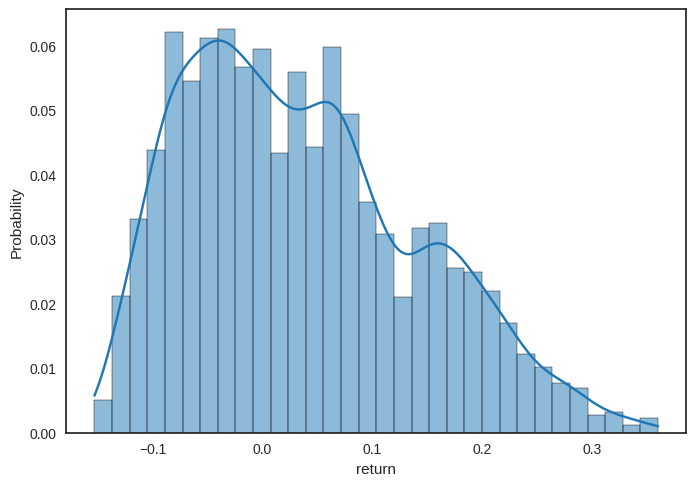

In [19]:
sns.histplot(data=f, x='return', stat='probability', kde=True)

Prepare the data for the `date` distribution. 

In [14]:
features_date_df = pd.DataFrame(data=set(features.index), columns=['date'])
features_date_df['date'] = pd.to_datetime(features_date_df['date'])
#features_date_df['count'] = 1
features_date_df.sort_values(by=['date'], ascending=True, inplace=True) 

<AxesSubplot:xlabel='date', ylabel='Count'>

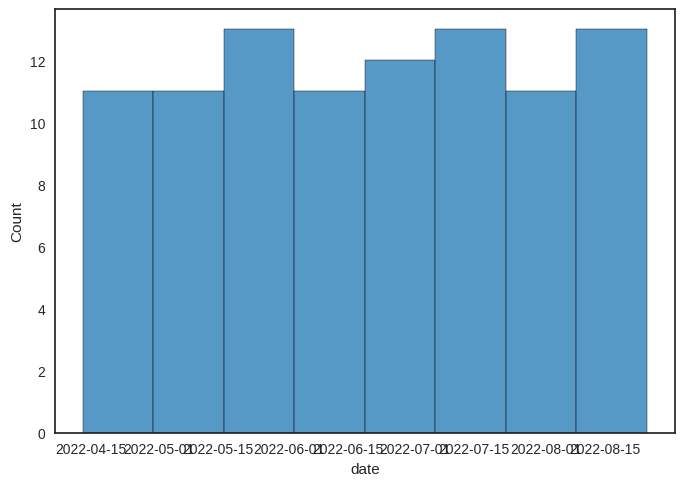

In [15]:
sns.histplot(data=features_date_df, x='date', bins='auto')

We now investigate the `date` distribution towards the youngest date. The fokus is on the distribution of the `date` in the interval between the last (youngest) date and `days_back`. Firstly, we plot a histogram to spot gaps and secondly, we quantify how uniform the distribution is.

<AxesSubplot:xlabel='date', ylabel='Count'>

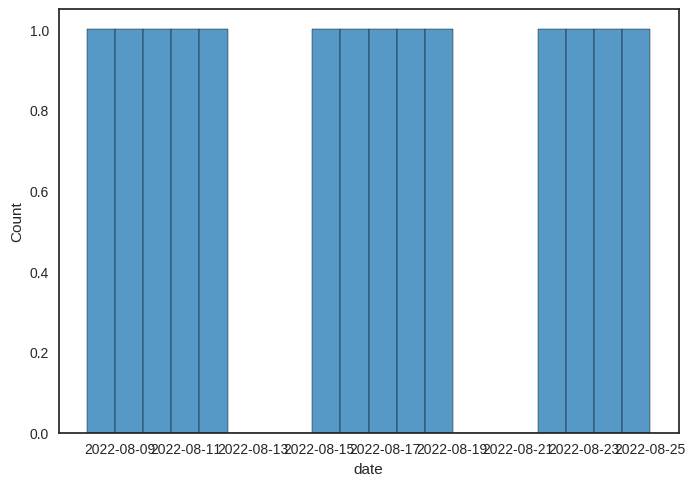

In [16]:
# number of days to look back from max_date
days_back = 20

max_date = features_date_df.iloc[-1]
towards_last_days = max_date['date'] - datetime.timedelta(days=days_back)
features_last_dates = features_date_df[features_date_df['date'] > towards_last_days]

sns.histplot(data=features_last_dates, x='date', bins=days_back)

In [17]:
num_gaps = days_back - len(features_last_dates) 
print("Number of gaps in the last intervall: {}".format(num_gaps))

if num_gaps > 0:
    print("Distribution is not uniform.")
else:
    print("Distribution is uniform.")

Number of gaps in the last intervall: 6
Distribution is not uniform.
